<a href="https://colab.research.google.com/github/Rina75/Airplane/blob/main/data_science_populasi_sultra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/dataset.csv', delimiter = ";")
data.head()

,Tahun,Kabupaten,Jumlah
0,2014,Buton,96634
1,2014,Muna,208916
2,2014,Konawe,229801
3,2014,Kolaka,235652
4,2014,Konawe Selatan,289815


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tahun      170 non-null    int64 
 1   Kabupaten  170 non-null    object
 2   Jumlah     170 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [ ]:
data.isnull().sum()

Tahun        0
Kabupaten    0
Jumlah       0
dtype: int64

In [ ]:
data.index = data.Tahun
data.head()

,Tahun,Kabupaten,Jumlah
Tahun,,,
2014,2014,Buton,96634
2014,2014,Muna,208916
2014,2014,Konawe,229801
2014,2014,Kolaka,235652
2014,2014,Konawe Selatan,289815


In [ ]:
data = data.drop('Tahun', axis=1)
data.head()

,Kabupaten,Jumlah
Tahun,,
2014,Buton,96634
2014,Muna,208916
2014,Konawe,229801
2014,Kolaka,235652
2014,Konawe Selatan,289815


In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#scaled_data = scaler.fit_transform(data[['Jumlah']])

# Mengubah kembali hasil scaling menjadi DataFrame
#df = pd.DataFrame(data=scaled_data, columns=['Jumlah'], index=data.index)

# Memasukkan kolom 'Kabupaten' ke posisi pertama
#df.insert(0, 'Kabupaten', data['Kabupaten'])

# Menampilkan DataFrame hasil concat
#print(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data[['Jumlah']])

# Mengubah kembali hasil scaling menjadi DataFrame
df = pd.DataFrame(data=scaled_data, columns=['Jumlah'], index=data.index)

# Memasukkan kolom 'Kabupaten' ke posisi pertama
df.insert(0, 'Kabupaten', data['Kabupaten'])

# Menampilkan DataFrame hasil concat
print(df)

            Kabupaten    Jumlah
Tahun                          
2014            Buton  0.180980
2014             Muna  0.491454
2014           Konawe  0.549204
2014           Kolaka  0.565383
2014   Konawe Selatan  0.715150
...               ...       ...
2023       Muna Barat  0.160673
2023     Buton Tengah  0.244097
2023    Buton Selatan  0.189126
2023     Kota Kendari  0.920890
2023      Kota Baubau  0.373201

[170 rows x 2 columns]


In [ ]:
nama_kabupaten = df['Kabupaten'].unique()
nama_kabupaten

array(['Buton', 'Muna', 'Konawe', 'Kolaka', 'Konawe Selatan', 'Bombana',
       'Wakatobi', 'Kolaka Utara', 'Buton Utara', 'Konawe Utara',
       'Kolaka Timur', 'Konawe Kepulauan', 'Muna Barat', 'Buton Tengah',
       'Buton Selatan', 'Kota Kendari', 'Kota Baubau'], dtype=object)

In [ ]:
df_kab = {}

for kabupaten in nama_kabupaten:
    df_kab[kabupaten] = df[df['Kabupaten'] == kabupaten]
    df_kab[kabupaten] = df_kab[kabupaten].drop("Kabupaten", axis=1)

In [ ]:
for kabupaten, df_kabupaten in df_kab.items():
    print(f"Dataframe untuk {kabupaten}:")
    print(df_kabupaten)
    print("\n")

Dataframe untuk Buton:
         Jumlah
Tahun          
2014   0.180980
2015   0.183845
2016   0.188496
2017   0.191504
2018   0.194762
2019   0.197590
2020   0.231212
2021   0.236189
2022   0.241194
2023   0.246171


Dataframe untuk Muna:
         Jumlah
Tahun          
2014   0.491454
2015   0.498937
2016   0.509500
2017   0.518453
2018   0.525817
2019   0.533437
2020   0.507586
2021   0.516739
2022   0.525891
2023   0.535071


Dataframe untuk Konawe:
         Jumlah
Tahun          
2014   0.549204
2015   0.559736
2016   0.572061
2017   0.589362
2018   0.602319
2019   0.618039
2020   0.620652
2021   0.633510
2022   0.646340
2023   0.659032


Dataframe untuk Kolaka:
         Jumlah
Tahun          
2014   0.565383
2015   0.581705
2016   0.596535
2017   0.609260
2018   0.623934
2019   0.637309
2020   0.569470
2021   0.577682
2022   0.585812
2023   0.593803


Dataframe untuk Konawe Selatan:
         Jumlah
Tahun          
2014   0.715150
2015   0.730389
2016   0.743114
2017   0.754965
201

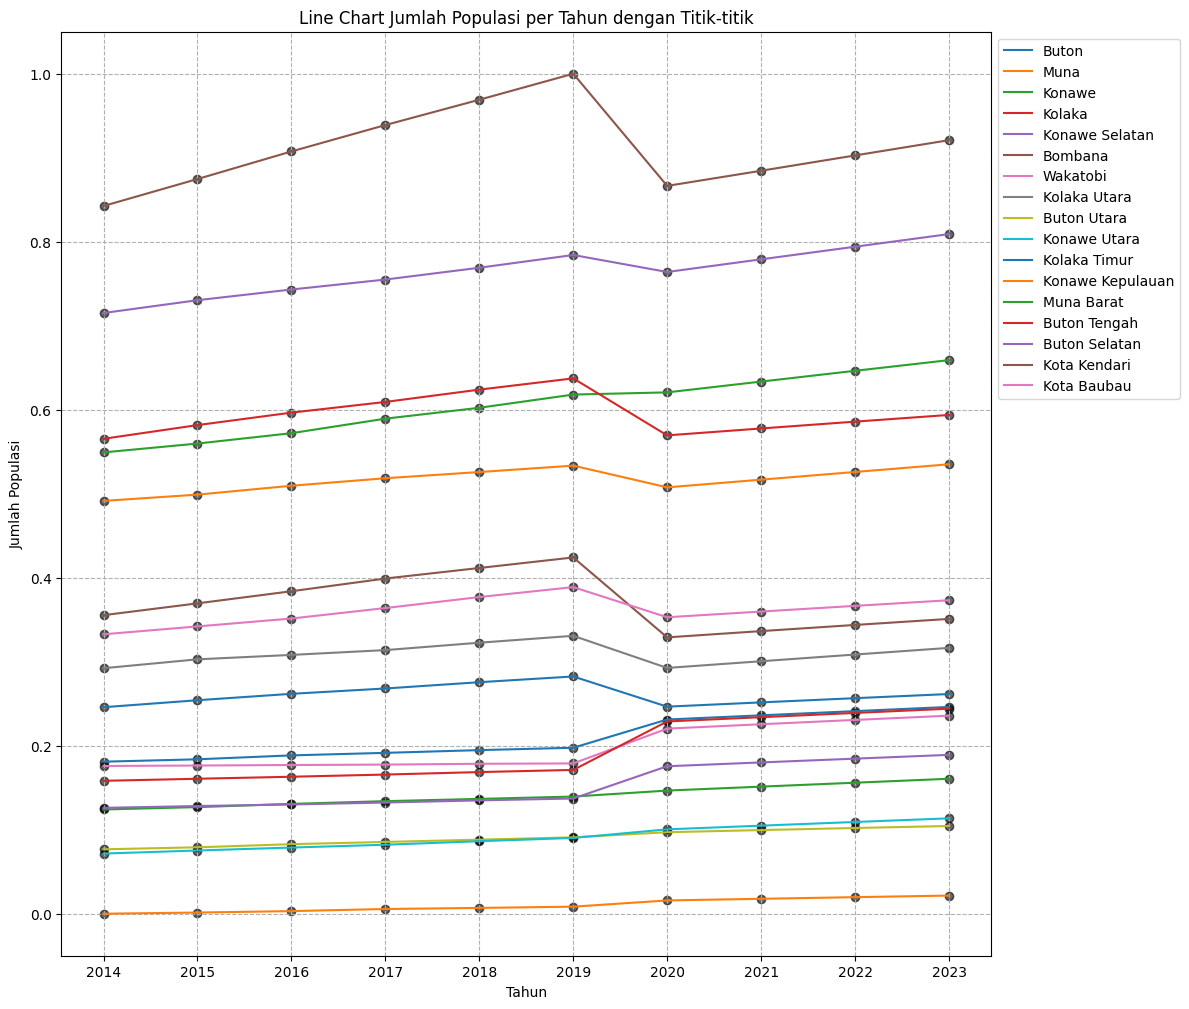

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Iterasi melalui setiap kabupaten dan membuat line chart dengan titik-titik
for kabupaten, df_kabupaten in df_kab.items():
    # Membuat line chart
    plt.plot(df_kabupaten.index, df_kabupaten['Jumlah'], label=kabupaten)

    # Menambahkan titik-titik dengan scatter plot
    plt.scatter(df_kabupaten.index, df_kabupaten['Jumlah'], marker='o', color='black', alpha=0.6)

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Populasi')
plt.title('Line Chart Jumlah Populasi per Tahun dengan Titik-titik')

# Menambahkan legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--')
plt.xticks(df_kabupaten.index)

# Menampilkan plot
plt.show()

In [ ]:
# # Plot data untuk melihat tren dan pola
# plt.figure(figsize=(10, 6))
# plt.plot(data)
# plt.title('Jumlah Penduduk')
# plt.xlabel('Tahun')
# plt.ylabel('Jumlah Penduduk')
# plt.show()

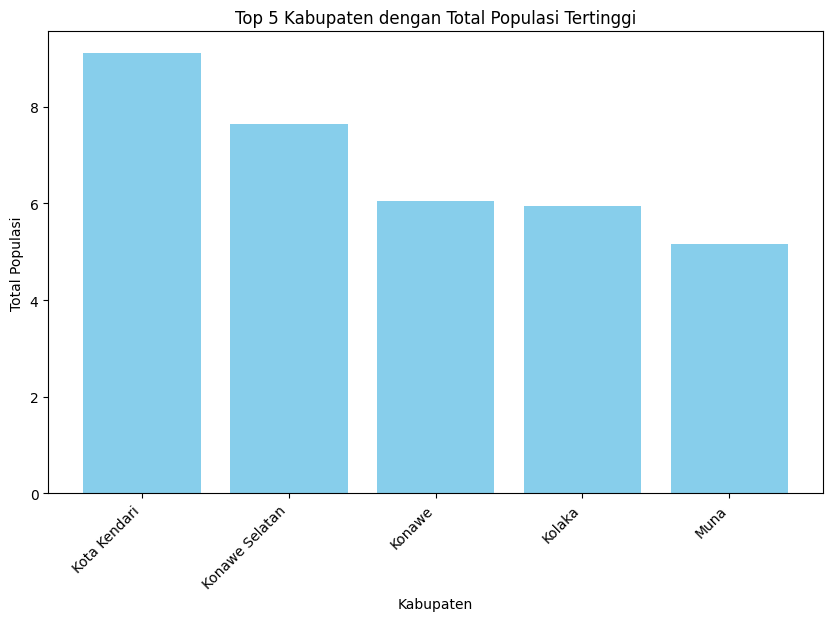

In [ ]:
# Menghitung total populasi untuk setiap kabupaten
total_populasi_per_kabupaten = df.groupby('Kabupaten')['Jumlah'].sum()

# Mengurutkan berdasarkan total populasi
total_populasi_per_kabupaten_sorted = total_populasi_per_kabupaten.sort_values(ascending=False)

# Mengambil 5 kabupaten dengan jumlah tertinggi
top5_kabupaten = total_populasi_per_kabupaten_sorted.head(5)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(top5_kabupaten.index, top5_kabupaten.values, color='skyblue')
plt.xlabel('Kabupaten')
plt.ylabel('Total Populasi')
plt.title('Top 5 Kabupaten dengan Total Populasi Tertinggi')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()

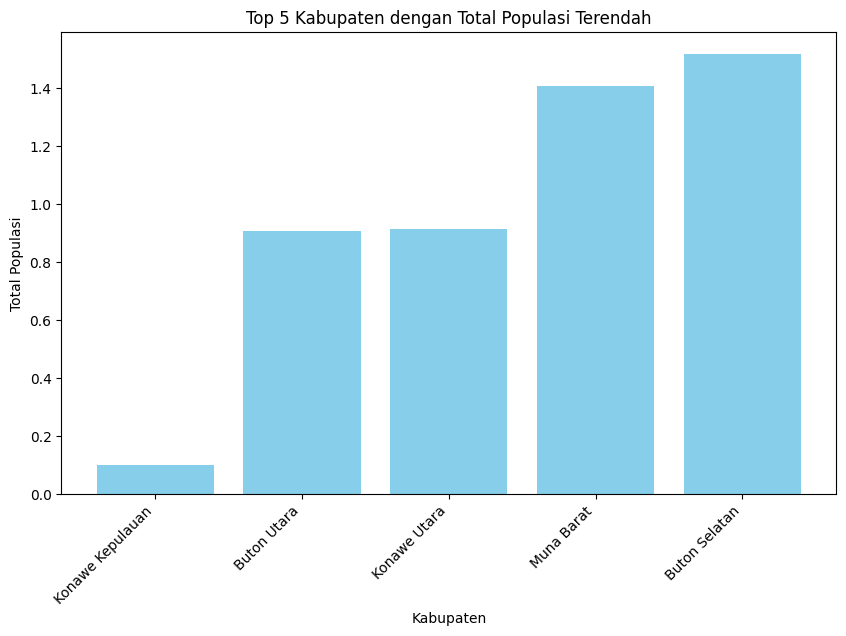

In [ ]:
# Menghitung total populasi untuk setiap kabupaten
total_populasi_per_kabupaten = df.groupby('Kabupaten')['Jumlah'].sum()

# Mengurutkan berdasarkan total populasi (dalam urutan terendah)
total_populasi_per_kabupaten_sorted = total_populasi_per_kabupaten.sort_values(ascending=True)

# Mengambil 5 kabupaten dengan jumlah terendah
bottom5_kabupaten = total_populasi_per_kabupaten_sorted.head(5)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom5_kabupaten.index, bottom5_kabupaten.values, color='skyblue')
plt.xlabel('Kabupaten')
plt.ylabel('Total Populasi')
plt.title('Top 5 Kabupaten dengan Total Populasi Terendah')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()

## Prediksi Jumlah penduduk

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

def calculate_rmse(actual_values, predicted_values):
    errors = predicted_values - actual_values
    squared_errors = errors**2
    mean_squared_error = squared_errors.mean()
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [ ]:
mape_SVR = []
rmse_SVR = []

for kab, data_kab in df_kab.items():

    X_train, X_test, Y_train, Y_test = train_test_split(data_kab.index, data_kab, test_size=0.2, random_state=0)

    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    Y_train = Y_train.values.reshape(-1, 1)
    Y_test = Y_test.values.reshape(-1, 1)

    # Skalakan fitur dan target
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    Y_train_scaled = scaler_Y.fit_transform(Y_train)
    Y_test_scaled = scaler_Y.transform(Y_test)

    # Inisialisasi model SVR
    svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

    # Melatih model
    svr.fit(X_train_scaled, Y_train_scaled.ravel())

    # Melakukan prediksi pada data uji
    pred_test_scaled = svr.predict(X_test_scaled)

    # Mengubah hasil prediksi kembali ke skala aslinya
    pred_test = scaler_Y.inverse_transform(pred_test_scaled.reshape(-1, 1))

    mape = mean_absolute_percentage_error(Y_test, pred_test)
    rmse = calculate_rmse(Y_test, pred_test)

    mape_SVR.append(mape)
    rmse_SVR.append(rmse)

    print(f"Dataframe untuk {kab}:")
    print("Support Vector Regression (SVR)")
    print('MAPE: {:.5%}'.format(mape))
    print("RMSE Score:", rmse)
    print("================================\n")

Dataframe untuk Buton:
Support Vector Regression (SVR)
MAPE: 2.17908%
RMSE Score: 0.004619084828888952

Dataframe untuk Muna:
Support Vector Regression (SVR)
MAPE: 0.82329%
RMSE Score: 0.004305983767431902

Dataframe untuk Konawe:
Support Vector Regression (SVR)
MAPE: 0.45477%
RMSE Score: 0.002787419002728988

Dataframe untuk Kolaka:
Support Vector Regression (SVR)
MAPE: 1.35722%
RMSE Score: 0.008749553552957937

Dataframe untuk Konawe Selatan:
Support Vector Regression (SVR)
MAPE: 0.24809%
RMSE Score: 0.002262278765301128

Dataframe untuk Bombana:
Support Vector Regression (SVR)
MAPE: 2.87274%
RMSE Score: 0.011216252456783898

Dataframe untuk Wakatobi:
Support Vector Regression (SVR)
MAPE: 3.34647%
RMSE Score: 0.00678573409616478

Dataframe untuk Kolaka Utara:
Support Vector Regression (SVR)
MAPE: 1.26727%
RMSE Score: 0.004128487342936011

Dataframe untuk Buton Utara:
Support Vector Regression (SVR)
MAPE: 0.14628%
RMSE Score: 0.00014444510925616072

Dataframe untuk Konawe Utara:
Suppo

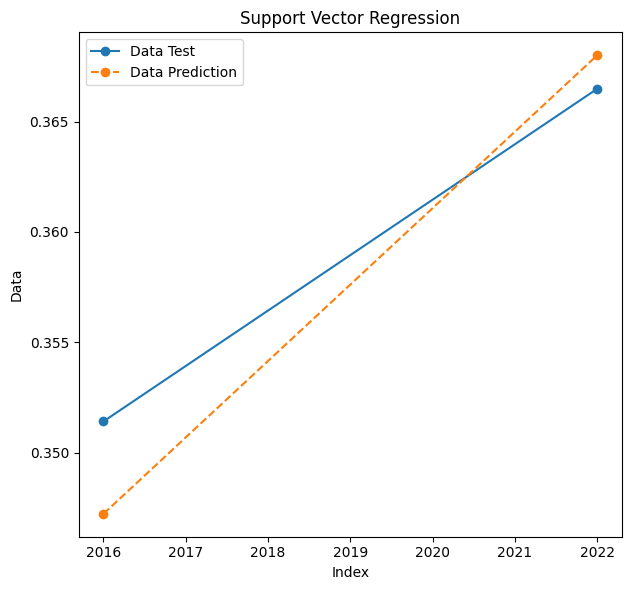

In [ ]:
data_kab = df_kab['Wakatobi']

# Support Vector Regression (SVR)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, Y_train_scaled.ravel())
pred_test_scaled = svr.predict(X_test_scaled)
pred_test_svr = scaler_Y.inverse_transform(pred_test_scaled.reshape(-1, 1))

# Menampilkan subplot perbandingan data aktual dan prediksi
plt.figure(figsize=(12, 6))

# Subplot Support Vector Regression
plt.subplot(1, 2, 2)
plt.plot(X_test, Y_test, label='Data Test', marker='o')
plt.plot(X_test, pred_test_svr, label='Data Prediction', linestyle='dashed', marker='o')
plt.xlabel('Index')
plt.ylabel('Data')
plt.title('Support Vector Regression')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
train_data = data_kab.loc[:'2022', 'Jumlah']

In [ ]:
# Langkah 3: Identifikasi Parameter
p = 1  # Orde AR (Autoregressive)
d = 1  # Orde Differencing
q = 1  # Orde MA (Moving Average)

In [ ]:
# Langkah 4: Pelatihan Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


model = ARIMA(train_data, order=(p, d, q))
fitted_model = model.fit()

In [ ]:
# Langkah 5: Prediksi untuk Tahun Selanjutnya
# Misalnya, kita ingin memprediksi jumlah penduduk untuk tahun 2023
future_years = 2  # Jumlah tahun yang ingin diprediksi
index = pd.Index(range(2023, 2023 + future_years), name='Tahun')  # Sesuaikan range index dengan data asli
# predictions = fitted_model.get_forecast(steps=len(index)).predicted_mean

# index = pd.Index(range(2023, 2023 + future_years), name='Tahun')
predictions = fitted_model.forecast(steps=future_years, index=index)

In [ ]:
print("Prediksi Jumlah Penduduk untuk Tahun Selanjutnya:")
print(predictions)
# predictions_percentage = predictions * 100

Prediksi Jumlah Penduduk untuk Tahun Selanjutnya:
Tahun
2023    0.231315
2024    0.231351
Name: predicted_mean, dtype: float64


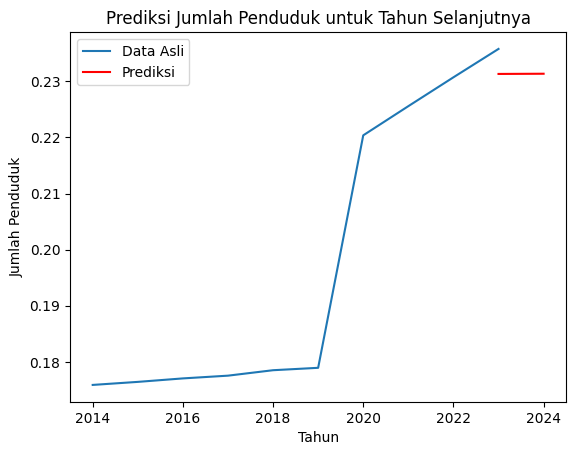

In [ ]:
plt.plot(data_kab.index, data_kab['Jumlah'], label='Data Asli')
plt.plot(index, predictions, color='red', label='Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
plt.title('Prediksi Jumlah Penduduk untuk Tahun Selanjutnya')
plt.legend()
plt.show()

In [ ]:
# # # Langkah 6: Evaluasi Akurasi Prediksi
# # # Hitung nilai error antara data asli dan hasil prediksi
# error =  data_kab.loc[:'2023', 'Jumlah'] - predictions.iloc[0]

# # # Hitung MAPE
# MAPE = abs((error / data_kab.loc[:'2023', 'Jumlah']) * 100)

# # # Tampilkan MAPE sebagai persentase akurasi
# print("MAPE (Mean Absolute Percentage Error): {:.2f}%".format(MAPE))

# # Langkah 6: Evaluasi Akurasi Prediksi
# # Hitung nilai error antara data asli dan hasil prediksi
# error = data_kab.loc[2023, 'Jumlah'] - predictions[0]

# # Hitung MAPE
# actual_value = data_kab.loc[2023, 'Jumlah']
# MAPE = abs(error / actual_value) * 100

# # Tampilkan MAPE sebagai persentase akurasi
# print("MAPE (Mean Absolute Percentage Error): {:.2f}%".format(MAPE))



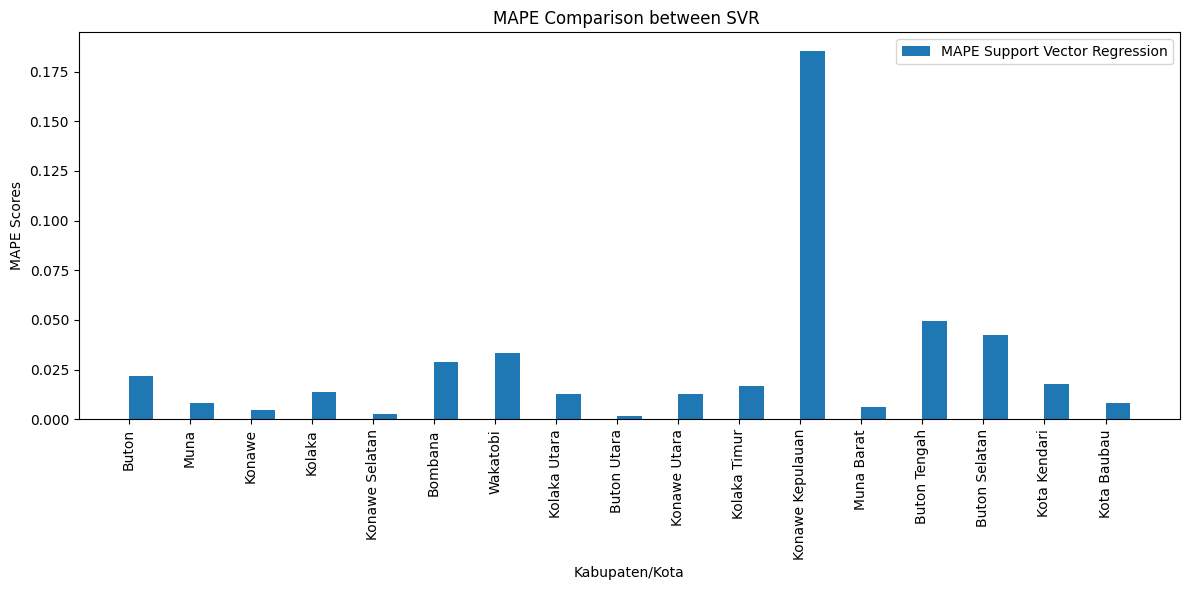

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk contoh
kabupaten_kota = list(df_kab.keys())

# Plotting bar chart untuk MAPE
bar_width = 0.4
index = np.arange(len(kabupaten_kota))

plt.figure(figsize=(12, 6))

# MAPE Support Vector Regression
plt.bar(index + 0.5*bar_width, mape_SVR, bar_width, label='MAPE Support Vector Regression')

plt.xlabel('Kabupaten/Kota')
plt.ylabel('MAPE Scores')
plt.title('MAPE Comparison between SVR ')
plt.xticks(index, kabupaten_kota, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

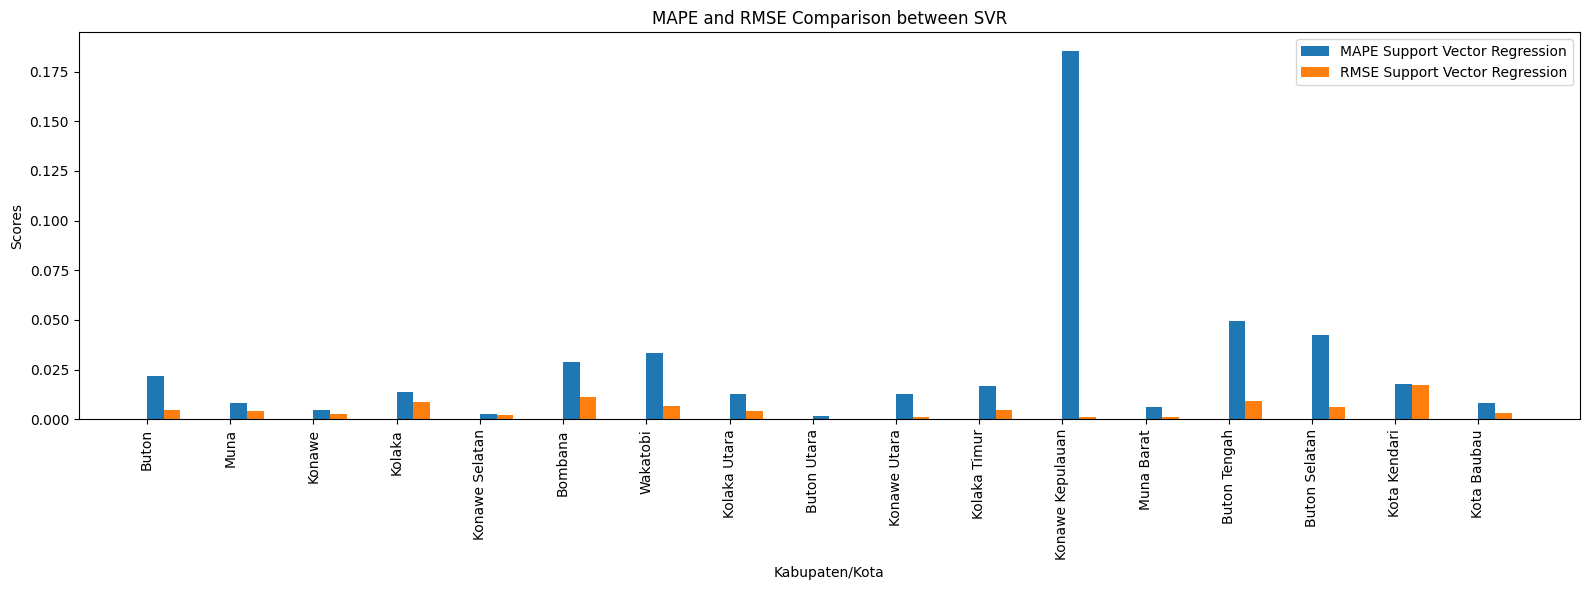

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk contoh
kabupaten_kota = list(df_kab.keys())

# Plotting bar chart untuk MAPE dan RMSE secara terpisah
bar_width = 0.2
index = np.arange(len(kabupaten_kota))

plt.figure(figsize=(16, 6))

# MAPE Support Vector Regression
plt.bar(index + 0.5*bar_width, mape_SVR, bar_width, label='MAPE Support Vector Regression')

# RMSE Support Vector Regression
plt.bar(index + 1.5*bar_width, rmse_SVR, bar_width, label='RMSE Support Vector Regression')

plt.xlabel('Kabupaten/Kota')
plt.ylabel('Scores')
plt.title('MAPE and RMSE Comparison between SVR')
plt.xticks(index, kabupaten_kota, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
svr.predict([[2023]])

array([1138.20660932])

In [ ]:
# import matplotlib.pyplot as plt

# # Tahun-tahun yang ada dalam data
# tahun = df['Tahun'].values

# # Jumlah penduduk yang ada dalam data
# jumlah_penduduk = df['Total'].values

# # Melakukan prediksi untuk tahun 2024
# prediksi_2025 = model.predict([[2024]])

# # Menampilkan hasil prediksi dalam grafik
# plt.figure(figsize=(10, 6))

# # Menampilkan data historis
# plt.plot(tahun, jumlah_penduduk, marker='o', label='Data Historis', color='blue')

# # Menampilkan titik prediksi untuk tahun 2024
# plt.scatter(2024, prediksi_2025, color='red', marker='o', label='Prediksi 2024')

# plt.title('Prediksi Jumlah Penduduk')
# plt.xlabel('Tahun')
# plt.ylabel('Jumlah Penduduk')
# plt.legend()
# plt.grid(True)
# plt.show()
